My first Jupyter Notebook

The intention here is to analyse the data coming out of Contemplas Templo, and create a workflow that can be automated based on this data.

!Do some formatting!

First I need to import the libraries I need

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter,sosfiltfilt

Now I need to load in some data

In [3]:
myfile = 'J-20220927-093421.txt'
df = pd.read_csv(myfile,sep='\t',header=(0), dtype='float32')


Lets examine this data frame

In [12]:
df

,fx12,fx34,fy14,fy23,fz1,fz2,fz3,fz4,fx,fy,fz,mx,my,mz,msx,msy,ax,ay,tz
0,0.018,-0.018,0.028,-0.028,0.000,0.000,-0.003,0.000,-0.006,-0.019,-0.391,0.098,-0.088,0.002,0.099,-0.088,0.0,0.0,0.0
1,0.020,-0.017,0.027,-0.029,0.000,0.001,0.000,0.000,0.170,-0.117,0.127,0.051,0.018,-0.021,0.053,0.022,0.0,0.0,0.0
2,0.019,-0.019,0.028,-0.029,0.000,-0.001,-0.002,-0.001,0.013,-0.078,-0.435,0.063,-0.050,-0.042,0.064,-0.049,0.0,0.0,0.0
3,0.020,-0.019,0.027,-0.030,0.000,0.000,-0.002,0.000,0.052,-0.195,-0.305,0.051,-0.042,-0.036,0.055,-0.041,0.0,0.0,0.0
4,0.019,-0.019,0.027,-0.028,0.001,0.002,-0.002,-0.001,-0.006,-0.097,-0.089,0.229,0.026,-0.054,0.231,0.026,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,0.013,-0.014,0.019,-0.019,0.000,0.001,0.001,-0.001,-0.026,0.000,0.084,0.039,0.086,-0.043,0.039,0.086,0.0,0.0,0.0
8412,0.012,-0.013,0.018,-0.018,0.000,-0.001,-0.001,-0.001,-0.104,-0.058,-0.478,0.075,-0.027,-0.035,0.076,-0.029,0.0,0.0,0.0
8413,0.011,-0.014,0.018,-0.019,-0.001,-0.001,0.000,-0.001,-0.221,-0.058,-0.478,0.003,0.018,-0.025,0.005,0.013,0.0,0.0,0.0
8414,0.011,-0.015,0.018,-0.020,-0.001,-0.001,-0.001,-0.001,-0.221,-0.117,-0.651,0.003,0.018,-0.033,0.006,0.013,0.0,0.0,0.0


In [13]:
downsampling_ratio = 1000 // 50  # 1000Hz to 50Hz
downsampled_df = df.groupby(df.index // downsampling_ratio).first()
downsampled_df

,fx12,fx34,fy14,fy23,fz1,fz2,fz3,fz4,fx,fy,fz,mx,my,mz,msx,msy,ax,ay,tz
0,0.018,-0.018,0.028,-0.028,0.000,0.000,-0.003,0.000,-0.006,-0.019,-0.391,0.098,-0.088,0.002,0.099,-0.088,0.0,0.0,0.0
1,0.020,-0.019,0.028,-0.029,-0.001,0.000,-0.001,-0.001,0.052,-0.078,-0.478,0.003,0.018,-0.064,0.005,0.019,0.0,0.0,0.0
2,0.019,-0.018,0.026,-0.029,0.000,0.000,0.000,0.000,0.052,-0.195,-0.046,-0.020,0.018,-0.052,-0.016,0.019,0.0,0.0,0.0
3,0.020,-0.019,0.027,-0.030,0.000,0.000,-0.003,0.001,0.091,-0.175,-0.391,0.075,-0.103,-0.043,0.078,-0.101,0.0,0.0,0.0
4,0.018,-0.018,0.028,-0.030,-0.001,0.000,-0.001,-0.001,0.033,-0.156,-0.391,0.075,0.018,0.020,0.078,0.019,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.012,-0.014,0.018,-0.019,-0.001,0.001,-0.001,-0.001,-0.143,-0.019,-0.348,0.086,0.026,-0.032,0.087,0.023,0.0,0.0,0.0
417,0.012,-0.014,0.018,-0.019,0.001,0.000,0.001,-0.003,-0.123,-0.078,-0.262,0.134,0.086,-0.045,0.136,0.084,0.0,0.0,0.0
418,0.014,-0.014,0.019,-0.018,0.000,0.000,0.000,-0.001,0.013,0.039,-0.305,0.051,0.033,-0.061,0.050,0.034,0.0,0.0,0.0
419,0.012,-0.012,0.018,-0.018,-0.001,-0.001,0.000,-0.001,-0.045,-0.019,-0.478,-0.044,0.003,-0.012,-0.044,0.002,0.0,0.0,0.0


## Filter data

In [4]:
# Filter requirements.
T = 1.121         # Sample Period
fs = 1000      # sample rate, Hz
cutoff = 20      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples
normal_cutoff = cutoff / nyq
sos = butter(order, normal_cutoff, btype='low', analog=False, output='sos')
data = sosfiltfilt(sos, df.to_numpy(), axis=0, padtype='odd', padlen=None)
headers = df.columns.values
filtdf = pd.DataFrame(data=data,    # values
             index=None,    # 1st column as index
             columns=headers)  # 1st row as the column names
filtdf.head()

,fx12,fx34,fy14,fy23,fz1,fz2,fz3,fz4,fx,fy,fz,mx,my,mz,msx,msy,ax,ay,tz
0,0.017884,-0.018063,0.027925,-0.027971,-0.000135,-9.216813e-06,-0.003052,-0.000070,-0.011997,-0.020211,-0.433565,0.093223,-0.084323,0.001223,0.094195,-0.084423,-5.208451e-157,-3.427552e-157,-1.177763e-156
1,0.018008,-0.018045,0.027897,-0.028058,-0.000094,-4.652348e-06,-0.002893,-0.000101,-0.004041,-0.026872,-0.411185,0.092095,-0.079639,-0.000547,0.093165,-0.079585,-5.504947e-157,-3.072070e-157,-1.436493e-156
2,0.018126,-0.018029,0.027867,-0.028146,-0.000056,-5.960285e-07,-0.002736,-0.000132,0.003531,-0.033530,-0.389885,0.090822,-0.074914,-0.002278,0.091991,-0.074714,-5.763849e-157,-2.594293e-157,-1.720685e-156
3,0.018237,-0.018015,0.027838,-0.028231,-0.000023,2.705932e-06,-0.002583,-0.000163,0.010653,-0.040096,-0.369877,0.089395,-0.070211,-0.003933,0.090662,-0.069875,-5.973365e-157,-1.978704e-157,-2.030373e-156
4,0.018340,-0.018003,0.027808,-0.028314,0.000007,5.007564e-06,-0.002434,-0.000194,0.017273,-0.046503,-0.351333,0.087802,-0.065583,-0.005479,0.089165,-0.065121,-6.120264e-157,-1.209153e-157,-2.365156e-156


## Segment Data

In [5]:
data_window = filtdf.index[filtdf['fz'] > 300]
max_index = data_window.max()
min_index = data_window.min()

data_window_array = data_window.to_numpy()

df_windowed = filtdf.iloc[data_window_array]
df_windowed.head()

,fx12,fx34,fy14,fy23,fz1,fz2,fz3,fz4,fx,fy,fz,mx,my,mz,msx,msy,ax,ay,tz
4105,0.423800,-0.341178,0.649516,-0.412245,0.252354,0.609573,1.307724,-0.002617,5.281077,15.165042,306.782589,-17.250406,41.317411,-1.581465,-17.584087,41.433606,-0.134394,-0.055765,0.153125
4106,0.428669,-0.346567,0.657560,-0.419564,0.256310,0.623230,1.344547,-0.002581,5.247417,15.211037,314.493527,-17.999437,42.469142,-1.590353,-18.334144,42.584601,-0.134830,-0.057269,0.154857
4107,0.432968,-0.351601,0.664803,-0.426224,0.260111,0.636209,1.379614,-0.002551,5.199997,15.247857,321.836948,-18.712273,43.564462,-1.599265,-19.047802,43.678883,-0.135236,-0.058644,0.156017
4108,0.436727,-0.356236,0.671253,-0.432122,0.263775,0.648446,1.412783,-0.002528,5.143629,15.282835,328.786037,-19.385319,44.597937,-1.609088,-19.721630,44.711123,-0.135606,-0.059891,0.156372
4109,0.439978,-0.360431,0.676923,-0.437148,0.267309,0.659901,1.443935,-0.002511,5.082846,15.323684,335.319602,-20.015146,45.565423,-1.620694,-20.352365,45.677277,-0.135938,-0.061012,0.155797


## CoP

(0.0, 1.0)

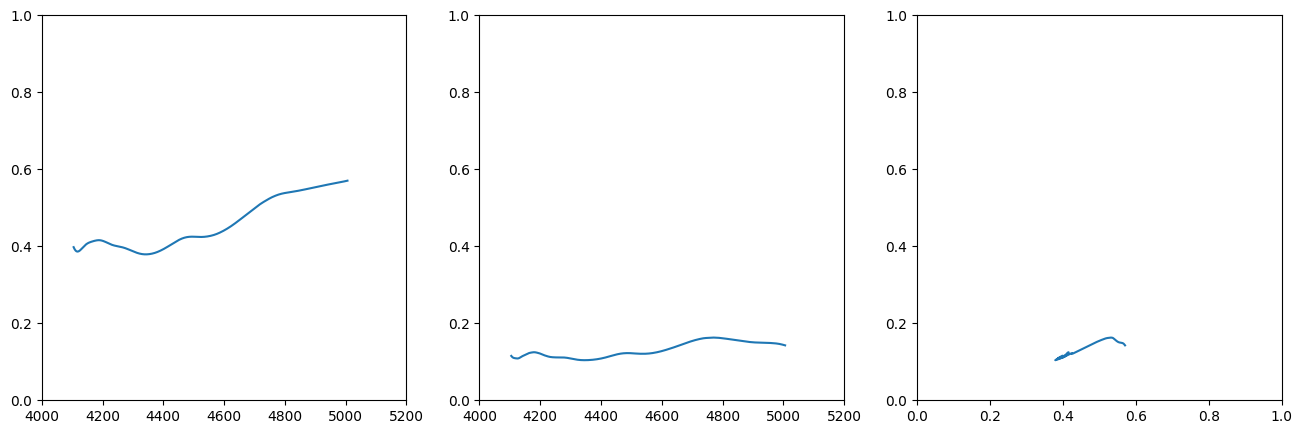

In [6]:
total_fz = df_windowed['fz1']+df_windowed['fz2']+df_windowed['fz3']+df_windowed['fz4']
fz12 = df_windowed['fz1']+df_windowed['fz2']
fz14 = df_windowed['fz1']+df_windowed['fz4']

xprop = fz12/total_fz
yprop = fz14/total_fz

fig, axs = plt.subplots(1, 3, figsize=(16, 5))  
axs[0].plot(xprop)
axs[1].plot(yprop)
axs[2].plot(xprop,yprop)

for i in range(0,2):
    axs[i].set_xlim(4000,5200)
    axs[i].set_ylim(0,1)
    
axs[2].set_xlim(0,1)
axs[2].set_ylim(0,1)

## Force vector magnitude and angle

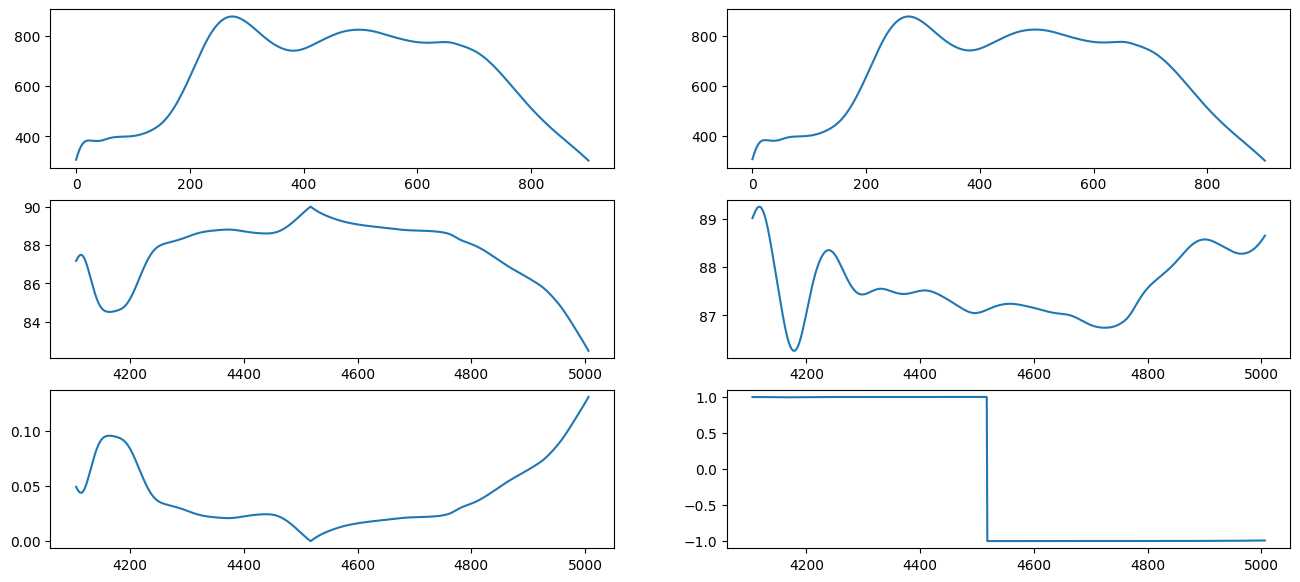

In [14]:
df_windowed['fz']
df_windowed['fy']
df_windowed['fx']

sag_magnitude = np.linalg.norm([df_windowed['fz'],df_windowed['fy']], axis=0)
cor_magnitude = np.linalg.norm([df_windowed['fz'],df_windowed['fx']], axis=0)

sag_angle = np.degrees(np.arctan(df_windowed['fz'] / df_windowed['fy']))
cor_angle = np.degrees(np.arctan(df_windowed['fz'] / df_windowed['fx']))

fig, axs = plt.subplots(3, 2, figsize=(16, 7)) 
axs[0,0].plot(sag_magnitude)
axs[0,1].plot(cor_magnitude)
axs[1,0].plot(np.abs(sag_angle))
axs[1,1].plot(cor_angle)
axs[2,0].plot(np.cos(np.radians(sag_angle)))
axs[2,1].plot(np.sin(np.radians(sag_angle)))


## Force vector construction

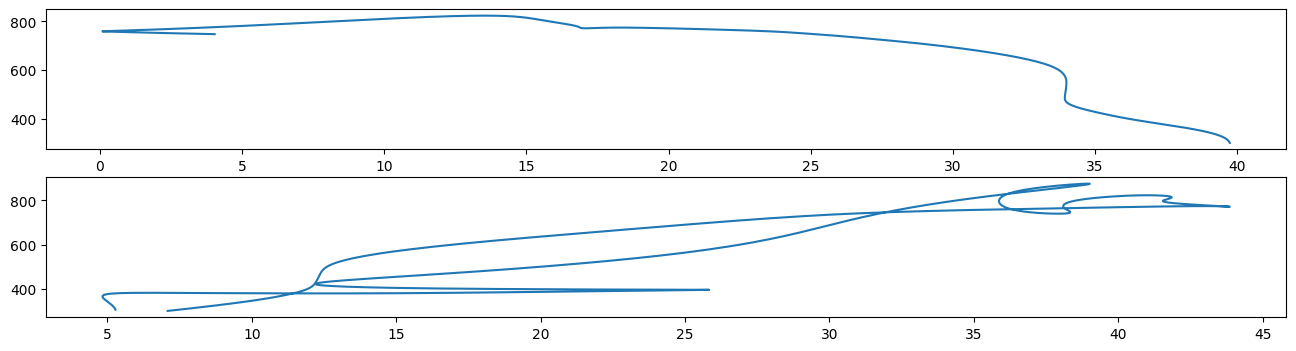

In [26]:
#sort out angle and magnitude first
#origin is at 0, 0
#proportional up to 100 in x and y

#Sag plane
x_coords_sag = sag_magnitude*np.sin(np.radians(sag_angle))
y_coords_sag = sag_magnitude*np.cos(np.radians(sag_angle))

x_coords_cor = cor_magnitude*np.sin(np.radians(cor_angle))
y_coords_cor = cor_magnitude*np.cos(np.radians(cor_angle))


fig, axs = plt.subplots(2, 1, figsize=(16, 4))
axs[0].plot(y_coords_sag[400:],x_coords_sag[400:])
axs[1].plot(y_coords_cor, x_coords_cor)

(0.0, 5.0)

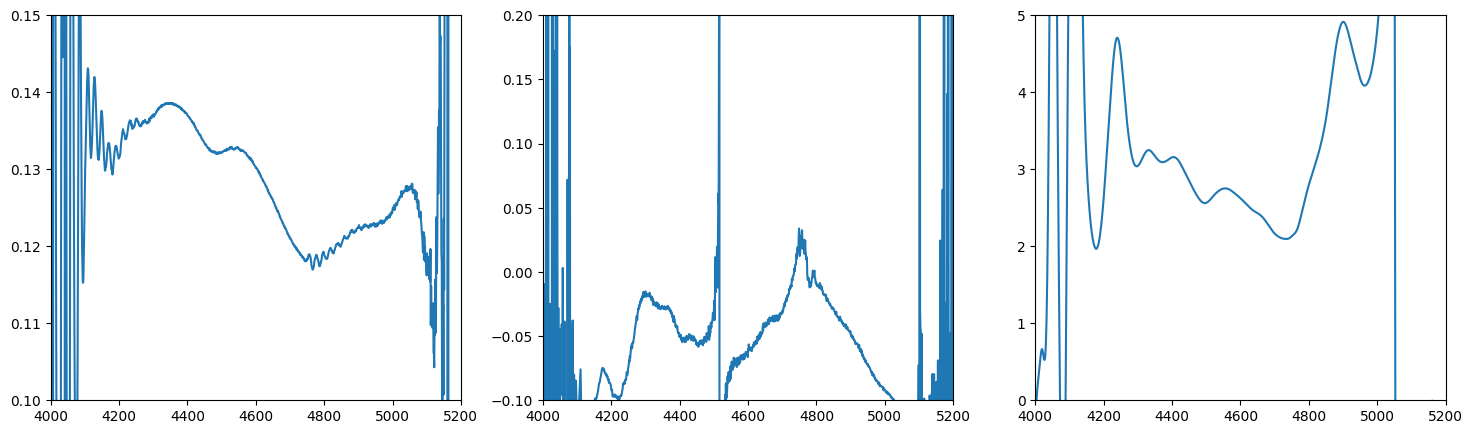

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  
axs[0].plot(dataFrame['my']/dataFrame['fz'])
axs[1].plot(dataFrame['mz']/dataFrame['fy'])
axs[2].plot(filtfilt(b, a, dataFrame['my']/dataFrame['fx']))

for i in range(0,3):
    axs[i].set_xlim(4000,5200)

axs[0].set_ylim(0.1,0.15)
axs[1].set_ylim(-0.1,0.2)
axs[2].set_ylim(0,5)

In [63]:
from scipy.signal import butter,filtfilt
# Filter requirements.
T = 1.121         # Sample Period
fs = 1000      # sample rate, Hz
cutoff = 25      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples
normal_cutoff = cutoff / nyq
# Get the filter coefficients 
b, a = butter(order, normal_cutoff, btype='low', analog=False)

So this data frame has 8416 data points, all of which are non-null, which are float64 type. This type is not needed as I only need a float with from 1000 to -0.001 as our max data value is 876.5 and I do not need so many decimal points, so I changed this to float32

Next I shall plot the data as is and see what we have to work with. I am only interested in fx, fy, fz, mx, my and mz. I have been told that the origin is located in the middle of the plate, slightly below the force plate. At some point, I will need to work out how far below the force plate it is.

<AxesSubplot:>

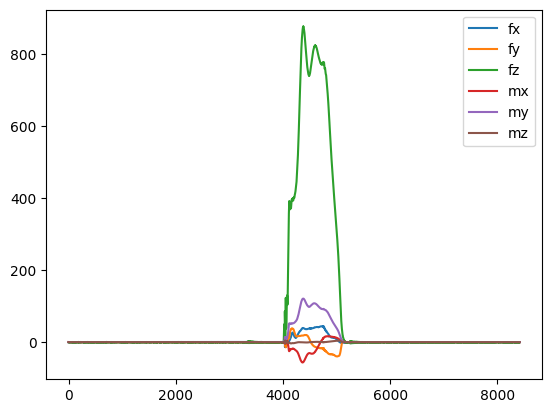

In [6]:
dataFrame[['fx','fy','fz','mx','my','mz']].plot()

Lets window this data some what so I can see the areas I'm interested in. I want to make this repeatable, so don't want to hard code the locations 4000 to 6000. It seems reasonable to use Fz where these values are above noise level - lets start by saying 5N. I will then add 50 frames either side of this

In [7]:
data_window = dataFrame.index[dataFrame['fz'] > 5]
max_index = data_window.max()
min_index = data_window.min()

data_window_array = data_window.to_numpy()

truncate_above = np.arange(max_index+1,max_index+51)
truncate_below = np.arange(min_index-51,min_index-1)

final_data_window = np.concatenate((truncate_below, data_window_array, truncate_above))
df_windowed = dataFrame[['fx','fy','fz','mx','my','mz']].iloc[final_data_window]
df_windowed_exact = dataFrame[['fx','fy','fz','mx','my','mz']].iloc[data_window_array]

Now lets replot with data

<AxesSubplot:>

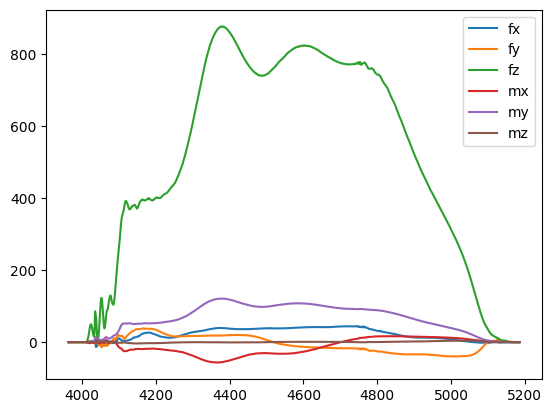

In [8]:
df_windowed.plot()

At some point I need to filter this data, but it doesn't look too bad, so will leave it for now. The next thing to do is try to calcuate magnitude and direction of force vector, as well as the centre of pressure on the force plate.

Lets start with magnitude in the sagittal and coronal planes

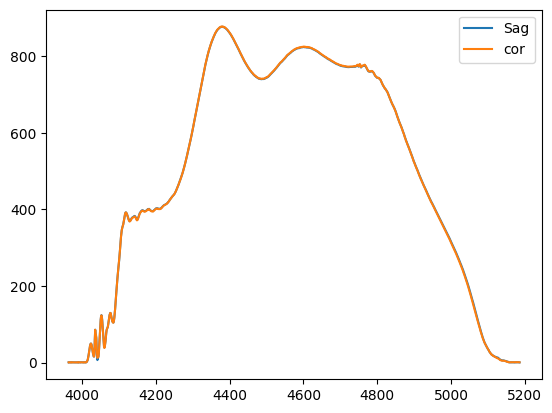

In [9]:
cor_force_magnitude = (df_windowed['fz']**2 + df_windowed['fx']**2)**0.5
sag_force_magnitude = (df_windowed['fz']**2 + df_windowed['fy']**2)**0.5
sag_force_magnitude.plot(label='Sag')
cor_force_magnitude.plot(label='cor')
plt.legend()

There is very little x and y component differences, therefore the magnitude of the force vector is almost exactly the same in the coronal plane and sagittal plane. This is to be expected.

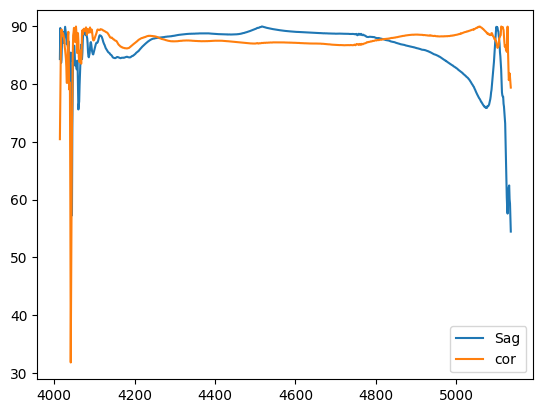

In [10]:
cor_force_direction = np.absolute(np.degrees(np.arctan(df_windowed_exact['fz'] / df_windowed_exact['fx'])))
sag_force_direction = np.absolute(np.degrees(np.arctan(df_windowed_exact['fz'] / df_windowed_exact['fy'])))
sag_force_direction.plot(label='Sag')
cor_force_direction.plot(label='cor')
plt.legend()

Alright, this data is looking a little bit hectic where it looks like the impulse has created some high frequency noise, so lets have a go a filtering this using a butterworth filter

In [11]:
df_windowed_exact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 4014 to 5136
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fx      1121 non-null   float32
 1   fy      1121 non-null   float32
 2   fz      1121 non-null   float32
 3   mx      1121 non-null   float32
 4   my      1121 non-null   float32
 5   mz      1121 non-null   float32
dtypes: float32(6)
memory usage: 35.0 KB


0.05

In [13]:
normal_cutoff = cutoff / nyq
# Get the filter coefficients 
b, a = butter(order, normal_cutoff, btype='low', analog=False)
fx = filtfilt(b, a, df_windowed_exact['fx'])
fy = filtfilt(b, a, df_windowed_exact['fy'])
fz = filtfilt(b, a, df_windowed_exact['fz'])
mx = filtfilt(b, a, df_windowed_exact['mx'])
my = filtfilt(b, a, df_windowed_exact['my'])
mz = filtfilt(b, a, df_windowed_exact['mz'])


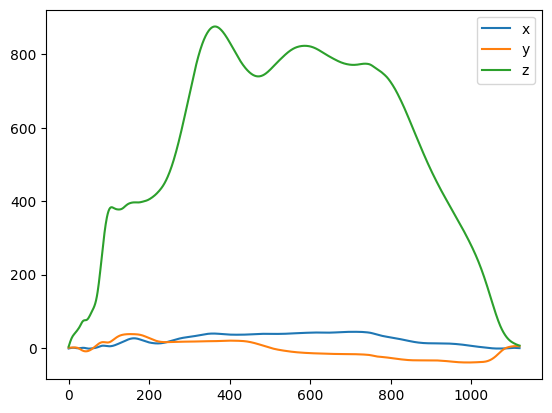

In [14]:
plt.plot(fx,label='x')
plt.plot(fy,label='y')
plt.plot(fz,label='z')
plt.legend()

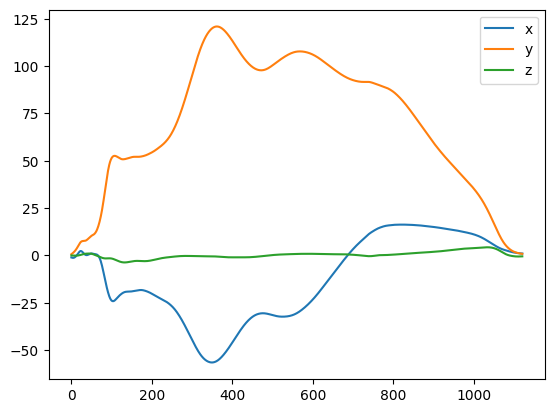

In [15]:
plt.plot(mx,label='x')
plt.plot(my,label='y')
plt.plot(mz,label='z')
plt.legend()

Now we have filtered the data, lets have a look to to see how our force vector directions looks

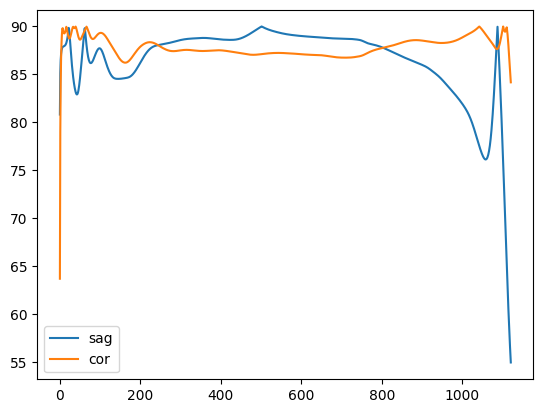

In [16]:
cor_force_direction = np.absolute(np.degrees(np.arctan(fz / fx)))
sag_force_direction = np.absolute(np.degrees(np.arctan(fz / fy)))
plt.plot(sag_force_direction, label='sag')
plt.plot(cor_force_direction, label='cor')
plt.legend()

Ok, this is looking a bit better, now I need to figure out how to get the centre of pressure. This can be done using the moments and basic mechanics.
I know the moment in x and the force in x therefore I know the moment arm in the x direction, etc. To do this I will work with the raw unfiltered data and see how that looks first before filtering it.

In [17]:
df_windowed_exact['copx'] = df_windowed_exact['mx'] / df_windowed_exact['fx']
df_windowed_exact['copy'] = df_windowed_exact['my'] / df_windowed_exact['fy']
df_windowed_exact['copz'] = df_windowed_exact['mz'] / df_windowed_exact['fz']

In [18]:
df_windowed_exact.describe()

,fx,fy,fz,mx,my,mz,copx,copy,copz
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,23.267395,-4.872623,544.639526,-11.866454,70.161209,0.212629,-0.867933,-1.344858,0.000694
std,15.717758,22.898134,267.621185,22.167454,35.031647,1.761306,12.318347,30.554552,0.013318
min,-13.718000,-39.894001,5.138000,-56.618999,0.737000,-4.150000,-283.666656,-859.641052,-0.153028
25%,10.658000,-24.337999,375.072998,-30.660000,50.036999,-0.720000,-1.384468,-3.729575,-0.001237
50%,25.209999,-7.358000,620.976990,-12.020000,78.153999,0.144000,-0.775029,-0.828562,0.000258
75%,38.237999,16.980000,776.286011,10.161000,100.183998,0.829000,0.479502,3.928438,0.001833
max,44.000000,38.058998,876.513977,16.410000,120.974998,4.627000,119.999992,302.442780,0.126310


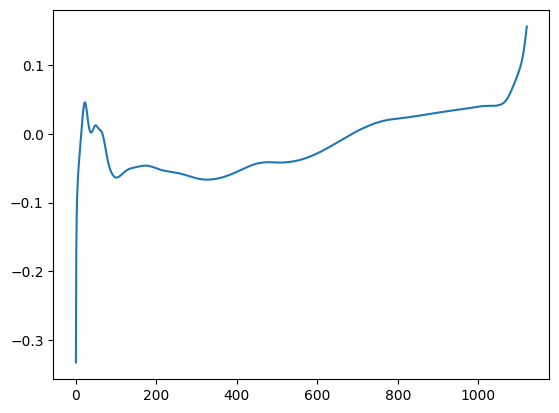

In [19]:
plt.plot(mx/fz)

## Restart


In [22]:
df_windowed.head()

,fx,fy,fz,mx,my,mz
3963,-0.163,-0.214,-0.478,-0.068,-0.072,0.004
3964,0.189,-0.351,-0.737,0.098,-0.012,0.032
3965,-0.026,-0.293,-0.219,0.122,-0.072,0.058
3966,0.170,-0.214,-0.478,0.027,-0.072,0.009
3967,0.013,-0.195,-0.564,0.098,-0.088,0.016


In [23]:
df_windowed['copx'] = df_windowed['mx'] / df_windowed['fx']
df_windowed['copy'] = df_windowed['my'] / df_windowed['fy']
df_windowed['copz'] = df_windowed['mz'] / df_windowed['fz']

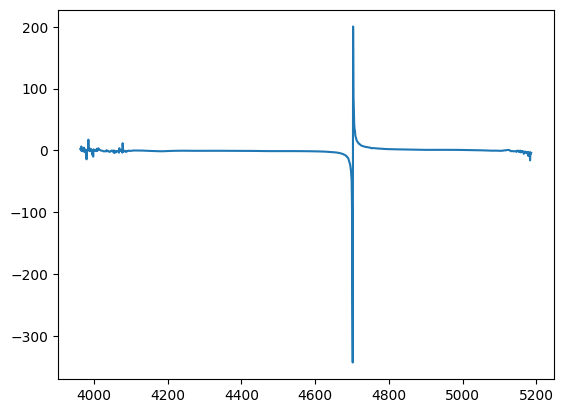

In [37]:
plt.plot(df_windowed['fx']/df_windowed['mx'])

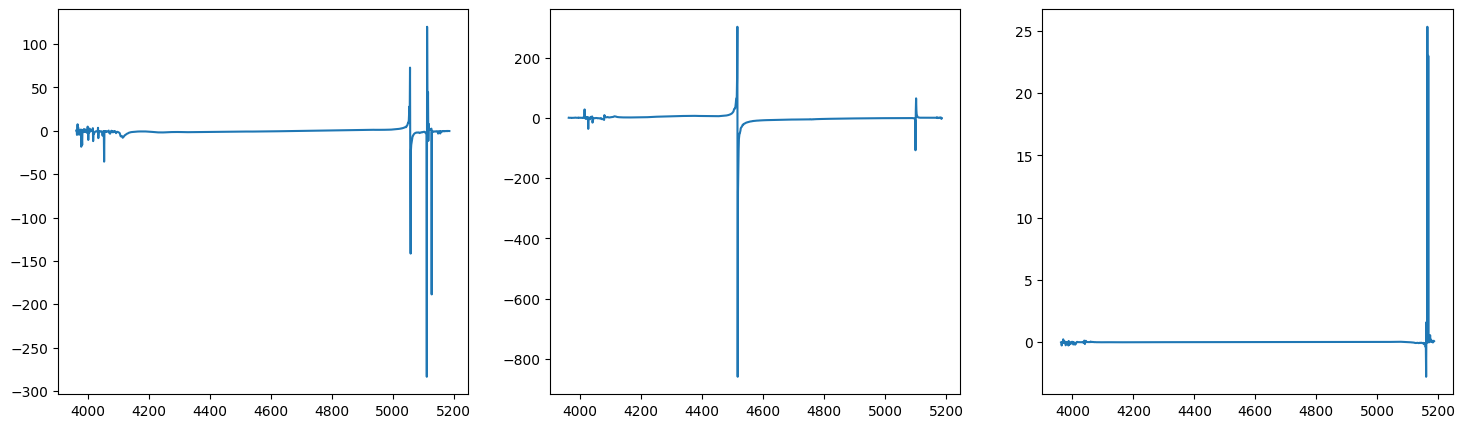

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  
axs[0].plot(df_windowed['copx'])
axs[1].plot(df_windowed['copy'])
axs[2].plot(df_windowed['copz'])